**Breast Cancer Prediction using Logistic Regression**

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib  
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
df = pd.read_csv(r'C:\Users\huyma\OneDrive\Desktop\BreastCancerData.csv', encoding='ISO-8859-1')

In [2]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


<Axes: >

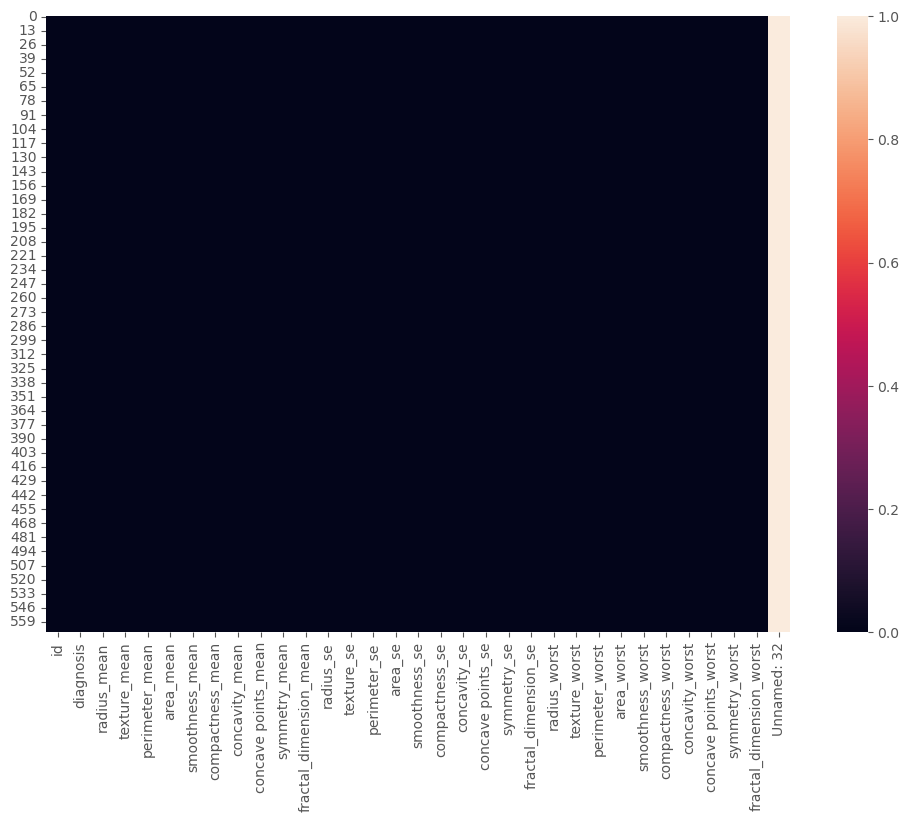

In [9]:
sns.heatmap(df.isnull())

In [11]:
df.drop(["Unnamed: 32", "id"], axis = 1, inplace = True)

In [13]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [15]:
df["diagnosis"]

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [17]:
from sklearn.model_selection import train_test_split

In [19]:
train_val_df, test_df = train_test_split(df, test_size = 0.2, random_state = 42)
train_df, val_df = train_test_split(train_val_df, test_size = 0.25, random_state = 42)

In [21]:
print("train_df's shape: ", train_df.shape)
print("val_df's shape: ", val_df.shape)
print("test_df's shape: ", test_df.shape)

train_df's shape:  (341, 31)
val_df's shape:  (114, 31)
test_df's shape:  (114, 31)


In [23]:
input_cols = list(train_df.columns)[1:]
target_cols = 'diagnosis'

In [25]:
print(input_cols)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [27]:
target_cols

'diagnosis'

In [29]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_cols].copy()

In [31]:
train_inputs

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
217,10.200,17.48,65.05,321.2,0.08054,0.05907,0.05774,0.01071,0.1964,0.06315,...,11.48,24.47,75.40,403.7,0.09527,0.1397,0.19250,0.03571,0.2868,0.07809
283,16.240,18.77,108.80,805.1,0.10660,0.18020,0.19480,0.09052,0.1876,0.06684,...,18.55,25.09,126.90,1031.0,0.13650,0.4706,0.50260,0.17320,0.2770,0.10630
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.16220,0.6656,0.71190,0.26540,0.4601,0.11890
504,9.268,12.87,61.49,248.7,0.16340,0.22390,0.09730,0.05252,0.2378,0.09502,...,10.28,16.38,69.05,300.2,0.19020,0.3441,0.20990,0.10250,0.3038,0.12520
251,11.500,18.45,73.28,407.4,0.09345,0.05991,0.02638,0.02069,0.1834,0.05934,...,12.97,22.46,83.12,508.9,0.11830,0.1049,0.08105,0.06544,0.2740,0.06487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,14.710,21.59,95.55,656.9,0.11370,0.13650,0.12930,0.08123,0.2027,0.06758,...,17.87,30.70,115.70,985.5,0.13680,0.4290,0.35870,0.18340,0.3698,0.10940
492,18.010,20.56,118.40,1007.0,0.10010,0.12890,0.11700,0.07762,0.2116,0.06077,...,21.53,26.06,143.40,1426.0,0.13090,0.2327,0.25440,0.14890,0.3251,0.07625
418,12.700,12.17,80.88,495.0,0.08785,0.05794,0.02360,0.02402,0.1583,0.06275,...,13.65,16.92,88.12,566.9,0.13140,0.1607,0.09385,0.08224,0.2775,0.09464
385,14.600,23.29,93.97,664.7,0.08682,0.06636,0.08390,0.05271,0.1627,0.05416,...,15.79,31.71,102.20,758.2,0.13120,0.1581,0.26750,0.13590,0.2477,0.06836


In [33]:
train_targets

217    B
283    M
0      M
504    B
251    B
      ..
57     M
492    M
418    B
385    M
325    B
Name: diagnosis, Length: 341, dtype: object

In [35]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_cols].copy()

In [37]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_cols].copy()

In [39]:
numeric_cols = train_inputs.select_dtypes(include = np.number).columns.tolist()
numeric_cols

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [41]:
from sklearn.preprocessing import MinMaxScaler

In [43]:
scaler = MinMaxScaler()

In [45]:
scaler.fit(df[numeric_cols])

MinMaxScaler()

In [47]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [49]:
train_inputs[numeric_cols].describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,...,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000
mean,0.332268,0.318504,0.326451,0.211712,0.390940,0.254246,0.200232,0.234369,0.383871,0.269382,...,0.291555,0.358350,0.278217,0.167458,0.398758,0.215037,0.210895,0.386814,0.266614,0.187798
std,0.164389,0.141954,0.165191,0.146545,0.130450,0.165308,0.185427,0.189919,0.142330,0.156107,...,0.172374,0.159304,0.167639,0.142196,0.154633,0.152456,0.160643,0.227713,0.126462,0.118234
min,0.033603,0.000000,0.028540,0.011410,0.000000,0.000000,0.000000,0.000000,0.054040,0.000000,...,0.026610,0.000000,0.020320,0.009438,0.066565,0.006821,0.000000,0.000000,0.000000,0.000000
25%,0.220029,0.223537,0.213461,0.114146,0.299630,0.129471,0.061809,0.095626,0.282828,0.161542,...,0.179651,0.244136,0.165347,0.080785,0.282837,0.107508,0.086821,0.216357,0.189237,0.102781
50%,0.294335,0.308083,0.288093,0.167508,0.377088,0.205632,0.135286,0.161531,0.373232,0.246420,...,0.248310,0.351812,0.232880,0.120306,0.390477,0.173094,0.171805,0.338866,0.251528,0.161157
75%,0.410762,0.400744,0.407781,0.260912,0.471879,0.338998,0.285380,0.336581,0.457576,0.338037,...,0.361793,0.463486,0.358534,0.205417,0.494156,0.304945,0.300240,0.537801,0.317564,0.242818
max,0.967343,1.000000,0.988943,1.000000,1.000000,0.895712,1.000000,1.000000,0.850000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.972264,0.883478,0.767412,1.000000,1.000000,0.773711


In [51]:
from sklearn.linear_model import LogisticRegression

In [53]:
model = LogisticRegression()

In [55]:
model.fit(train_inputs[numeric_cols], train_targets)

LogisticRegression()

In [57]:
numeric_cols

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [59]:
model.coef_.tolist()

[[1.699442899676257,
  1.6190690210010756,
  1.6776702521862106,
  1.4228631945589292,
  0.49262032700392255,
  0.5196920392989056,
  1.384262008917285,
  1.8460089231385726,
  0.40899608903679907,
  -0.7923861487540889,
  0.89795444593277,
  -0.08785239447468778,
  0.6965593447948512,
  0.6338716713814561,
  0.009796305244214563,
  -0.3658661243764327,
  -0.11081929459530576,
  0.1543059361839644,
  -0.1609176761511088,
  -0.540351863842653,
  1.9720142501100892,
  2.0372524362255255,
  1.8068771729991244,
  1.4071304905578021,
  1.187353294454215,
  0.9115970392735058,
  1.4583782462930348,
  2.251601386790737,
  1.285832977671783,
  0.2786246273914274]]

In [61]:
model.intercept_

array([-7.99219556])

In [65]:
n = len(model.coef_.tolist())
pd.DataFrame({
    'Feature': numeric_cols,
    'Weight': model.coef_.tolist()[0]
})

,Feature,Weight
0,radius_mean,1.699443
1,texture_mean,1.619069
2,perimeter_mean,1.677670
3,area_mean,1.422863
4,smoothness_mean,0.492620
5,compactness_mean,0.519692
6,concavity_mean,1.384262
7,concave points_mean,1.846009
8,symmetry_mean,0.408996
9,fractal_dimension_mean,-0.792386


<Axes: xlabel='Weight', ylabel='Feature'>

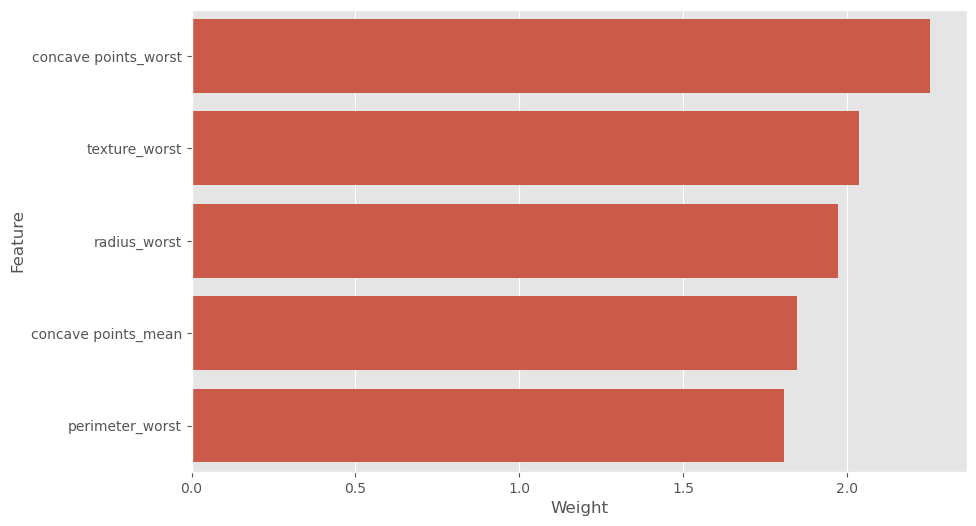

In [67]:
plt.figure(figsize = (10, 6))
sns.barplot(data = weight_df.sort_values('Weight', ascending = False).head(5), x = 'Weight', y = 'Feature')

In [69]:
X_train = train_inputs[numeric_cols]
X_val = val_inputs[numeric_cols]
X_test = test_inputs[numeric_cols]

In [71]:
train_preds = model.predict(X_train)

In [73]:
train_preds

array(['B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B',
       'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M',
       'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B',
       'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'B', 'M', 'M', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'M', 'B', 'M',
       'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M',
       'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B',
       'B', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B',
       'M', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B

In [75]:
train_targets

217    B
283    M
0      M
504    B
251    B
      ..
57     M
492    M
418    B
385    M
325    B
Name: diagnosis, Length: 341, dtype: object

In [77]:
from sklearn.metrics import accuracy_score

In [79]:
accuracy_score(train_targets, train_preds)

0.9736070381231672

In [81]:
from sklearn.metrics import confusion_matrix
confusion_matrix(train_targets, train_preds, normalize = 'true')

array([[0.99537037, 0.00462963],
       [0.064     , 0.936     ]])

In [91]:
def predict_and_plot(inputs, targets, name = ''):
    preds = model.predict(inputs)
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy*100))
    cf = confusion_matrix(targets, preds, normalize = 'true')
    plt.figure(figsize = (4, 4))
    sns.heatmap(cf, annot = True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion matrix'.format(name))
    return preds

Accuracy: 97.36%


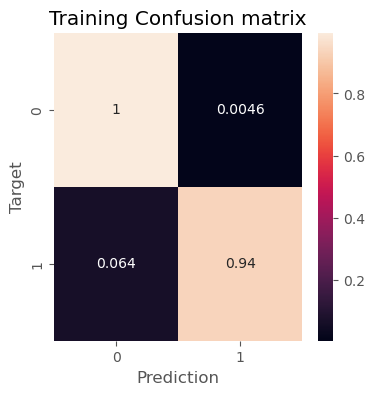

In [93]:
train_preds = predict_and_plot(X_train, train_targets, 'Training')

Accuracy: 95.61%


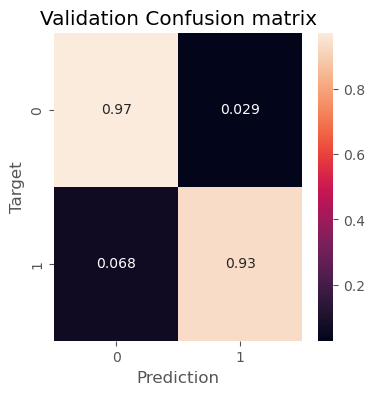

In [95]:
val_preds = predict_and_plot(X_val, val_targets, 'Validation')

Accuracy: 97.37%


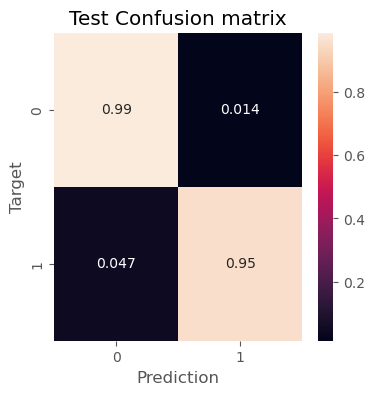

In [97]:
test_preds = predict_and_plot(X_test, test_targets, "Test")